# Dataset Description:

The dataset includes details of applicants who have applied for loan, it has details like credit history, loan amount, their income, dependents etc. We have to predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. So, the target variable here is Loan_Status.

# Importing the Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("LoanApplicationStatus.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

# Checking the Null Values:

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

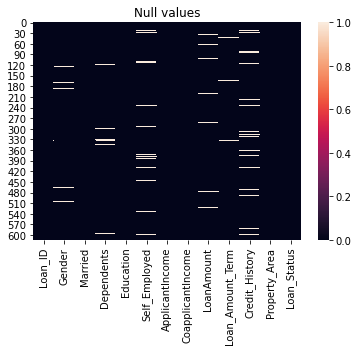

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

There are Null values present in the dataset, through observation we got to know that there are lot of blank rows present in the dataset.

In [17]:
df.replace(" ",np.nan)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
df.dropna(subset= ["Gender", "Dependents", "Self_Employed", "LoanAmount", "Loan_Amount_Term", "Credit_History"], inplace=True)

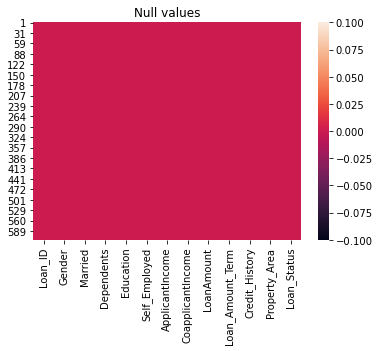

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no null values in the dataset now.

In [22]:
df.dtypes

Loan_ID                int64
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are columns with object type, so we will be using label encoder to encode it.

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [24]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,5,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [26]:
df.dtypes

Loan_ID                int64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

# Describing the Dataset:

In [27]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,307.214583,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,177.433330,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,154.750000,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,302.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.500000,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


# Checking the Correlation with the Traget variable:

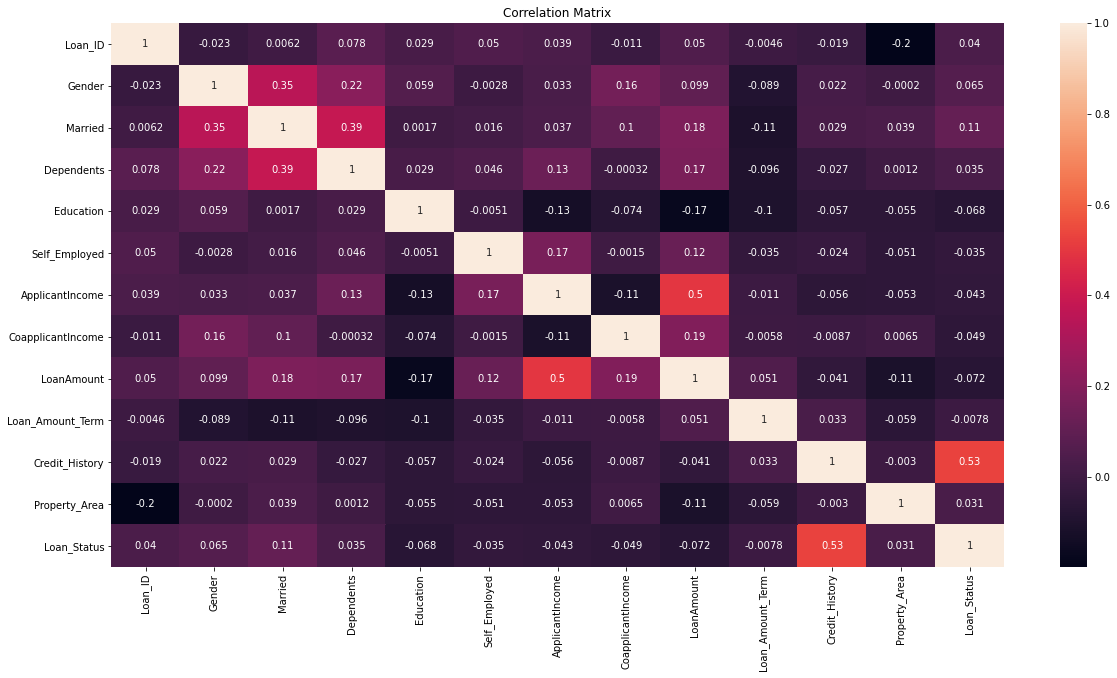

In [28]:
corr_mat=df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [29]:
corr_matrix=df.corr()
corr_matrix["Loan_Status"].sort_values(ascending=False) 

Loan_Status          1.000000
Credit_History       0.529390
Married              0.112321
Gender               0.064504
Loan_ID              0.040080
Dependents           0.035428
Property_Area        0.031361
Loan_Amount_Term    -0.007798
Self_Employed       -0.034715
ApplicantIncome     -0.043152
CoapplicantIncome   -0.049020
Education           -0.068437
LoanAmount          -0.071753
Name: Loan_Status, dtype: float64

We can see that variable Credit_History has max correlation with the target variable Loan_Status 

# Splitting the independent variable and target variable in x and y:

In [34]:
x= df.drop("Loan_Status",axis=1)
y= df["Loan_Status"]

# Checking the skewness:

In [40]:
x.skew()

Loan_ID             -0.000692
Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
dtype: float64

There is skewness in the dataset. We will remove the skewness using power_transform function

In [41]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [42]:
df_new.skew()

Loan_ID             -0.285838
Gender              -1.678471
Married             -0.621334
Dependents           0.391653
Education            1.488474
Self_Employed        2.111872
ApplicantIncome     -0.112745
CoapplicantIncome   -0.127432
LoanAmount           0.044294
Loan_Amount_Term     0.400696
Credit_History      -2.013253
Property_Area       -0.147170
dtype: float64

The columns which still shows skewness are-
1. Gender-Categorical
2. Married-Categorical
3. Education-Categorical
4. Self_Employed-Categorical
5. Credit_History-Categorical

So, we will not treat it.

In [56]:
x=df_new

# Checking Outliers:

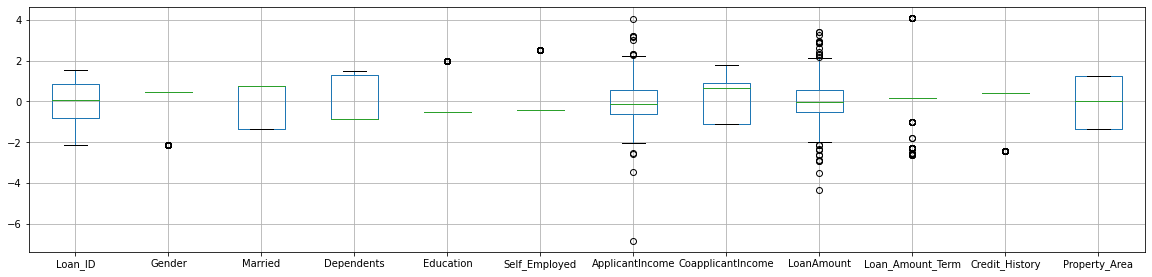

In [58]:
x.iloc[:,0:13].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

Removing outliers is resulting in lossing major data. Thus, we will not remove outliers. 

# Finding best random_state:

In [57]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.7708333333333334 on Random_state 1
Best accuracy is 0.7847222222222222 on Random_state 2
Best accuracy is 0.7916666666666666 on Random_state 3
Best accuracy is 0.7986111111111112 on Random_state 9
Best accuracy is 0.8125 on Random_state 10
Best accuracy is 0.875 on Random_state 14


We have found best random_state value as 14. We will create our train_test_split using the random_state(14)

# Creating train-test-split:

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=14)

In [60]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.875
[[ 20  18]
 [  0 106]]
              precision    recall  f1-score   support

         0.0       1.00      0.53      0.69        38
         1.0       0.85      1.00      0.92       106

    accuracy                           0.88       144
   macro avg       0.93      0.76      0.81       144
weighted avg       0.89      0.88      0.86       144



In [61]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7083333333333334
[[21 17]
 [25 81]]
              precision    recall  f1-score   support

         0.0       0.46      0.55      0.50        38
         1.0       0.83      0.76      0.79       106

    accuracy                           0.71       144
   macro avg       0.64      0.66      0.65       144
weighted avg       0.73      0.71      0.72       144



In [62]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8541666666666666
[[ 21  17]
 [  4 102]]
              precision    recall  f1-score   support

         0.0       0.84      0.55      0.67        38
         1.0       0.86      0.96      0.91       106

    accuracy                           0.85       144
   macro avg       0.85      0.76      0.79       144
weighted avg       0.85      0.85      0.84       144



In [63]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test, ad_pred))
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))

0.875
[[ 21  17]
 [  1 105]]
              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70        38
         1.0       0.86      0.99      0.92       106

    accuracy                           0.88       144
   macro avg       0.91      0.77      0.81       144
weighted avg       0.89      0.88      0.86       144



We are getting highest accuracy with LogisticRegression (88%) but it can be due to overfitting also so we will check cross validation scores

In [69]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of LogisticRegression model : ",scr.mean())

Cross validation score of LogisticRegression model :  0.80625


In [70]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of DecisionTressClassifier model : ",scr.mean())

Cross validation score of DecisionTressClassifier model :  0.7041666666666667


In [71]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of RandomForestClassifier model : ",scr.mean())

Cross validation score of RandomForestClassifier model :  0.7958333333333334


In [72]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model : ",scr.mean())

Cross validation score of SVC model :  0.8208333333333332


The accuracy and cross validation score for DTC is same, so this is our best model.

# Hyper parameter tunning:

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameters={'max_depth': np.arange(2, 15),
           'criterion':['gini','entropy']}

In [75]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [76]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [77]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [78]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [79]:
accuracy_score(y_test,GCV_pred)

0.8194444444444444

In [81]:
import joblib
joblib.dump(GCV.best_estimator_,"LoanApplicationModelDTC.pkl")

['LoanApplicationModelDTC.pkl']